<a href="https://colab.research.google.com/github/ArmanAbdullah/Sentiment-Analysis-Polarity-Detection/blob/master/Ascertaining_Polarity_of_Public_Opinions_on_Bangladesh_Cricket_through_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import nltk
import re

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Reading Data

In [ ]:
classDict = {'negative': 0, 'positive': 1,'neutral': 2}
label2id = []
def read_File():
    sentences = []
    labels = []
    scrip_dir = os.path.dirname(os.path.realpath('__file__'))
    rel_path = "gdrive/My Drive/Final Project-2020/final_dataset4.txt"
    abs_file_path = os.path.join(scrip_dir, rel_path)
    with open(abs_file_path, encoding='utf-8') as f:
        for line in f:
            word = line.split()
            labels.append(word[0])
            label2id.append(classDict[word[0]])
            sentence = re.sub(word[0]+' ', '', line)
            sentences.append(sentence)
    print('read file complete')
    
    return sentences, labels

In [ ]:
sentences, labels = read_File()

read file complete


In [ ]:
data = {'label': labels,
        'sentence': sentences
        }

df = pd.DataFrame(data, columns = ['label', 'sentence'])

df.head()

,label,sentence
0,positive,"মুসফিক , মুমিনুল আর আসরাফুল বাংলাদেশের ক্রিকেট..."
1,positive,এই মুহূর্তে পৃথিবীর সবচেয়ে ভয়ংকর শক্তিশালী ক্র...
2,negative,বলদ গুলা বলিং ভাল করলে বেটিং খারাপ করে বেটিং ভ...
3,positive,খুব ভাল ছিল ভাইয়া। আরো আসা করছি\n
4,negative,ক্রিকেট খেলা বন্ধ করে দেওয়া উচিত।\n


In [ ]:
df.describe(include='all')

,label,sentence
count,2501,2501
unique,3,2501
top,negative,আসলে বাংলাদেশের নির্বাচন কমিটি স্বধীন ভাবে কাজ...
freq,1201,1


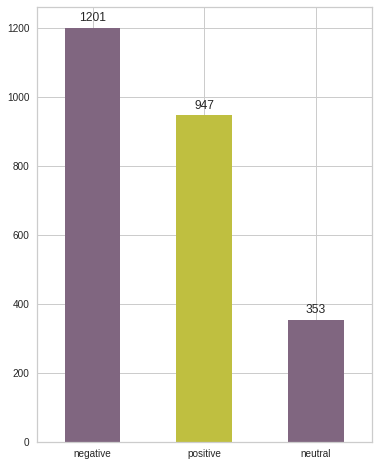

In [ ]:
my_colors = [(0.5,0.4,0.5), (0.75, 0.75, 0.25)]*5
ax=df['label'].value_counts().plot(kind="bar", rot=0,color=my_colors,figsize=(6,8))
for p in ax.patches:
  ax.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., p.get_height()),
  ha='center',va='center', xytext=(0, 10),textcoords='offset points')

In [ ]:
print([x for x in sentences if sentences.count(x) > 1])

[]


# Data cleaning

## Removing Extra characters

In [ ]:
def clean_sentence(sent):

    sent = re.sub('[?.`*^()!°¢܌Ͱ̰ߒנ~×Ҡߘ:ҰߑÍ|।;!,&%\'@#$><A-Za-z0+-9=./''""_০-৯]', ' ', sent)
    sent = re.sub(r'(\W)(?=\1)', ' ', sent)
    sent = re.sub(r'https?:\/\/.*[\r\n]*', ' ', sent, flags=re.MULTILINE)
    sent = re.sub(r'\<a href', ' ', sent)
    sent = re.sub(r'&amp;', ' ', sent) 
    sent = re.sub(r'<br />', ' ', sent)
    sent = re.sub(r'\'', ' ', sent)
    sent = re.sub(r'ߑͰߑ̰ߒנ', ' ', sent)
    sent = re.sub(r'ߎɰߎɰߎɍ', ' ', sent)
    sent = re.sub(' +',' ',sent)
    sent = sent.strip()
    return sent

In [ ]:
for i, sent  in enumerate(df['sentence'].tolist()):
    df.loc[i,'clean_sentence'] = clean_sentence(sent)

In [ ]:
print('Before Cleaning: ',df.loc[742,'sentence'])
test = df.loc[742,'clean_sentence']
print('After Cleaning: ',test)

Before Cleaning:  অনেক ভালো খেলেছে বাংলাদেশ ২০০/৮, লিড ৩১২। পরের ইনিংসে ভালো করবে।

After Cleaning:  অনেক ভালো খেলেছে বাংলাদেশ লিড পরের ইনিংসে ভালো করবে


## Tokenized Sentence

In [ ]:
def tokenized_data(sent):
    tokenized_text = sent.split()
    return tokenized_text

In [ ]:
tokenized_data("অভিনন্দন মোস্তাফিজ তুমি এটার উপযুক্ত ছিলে")

['অভিনন্দন', 'মোস্তাফিজ', 'তুমি', 'এটার', 'উপযুক্ত', 'ছিলে']

## Remove stopwords

In [ ]:
def read_stop_words():
    stop_words = []
    scrip_dir = os.path.dirname(os.path.realpath('__file__'))
    rel_path = "gdrive/My Drive/Final Project-2020/stopwords4.txt"
    abs_file_path = os.path.join(scrip_dir, rel_path)
    with open(abs_file_path, encoding='utf-8') as f:
        for line in f:
          line=re.sub('\n','',line)
          if(not line in stop_words):{
              stop_words.append(line)
          }
          
          
    print('read file complete')
    
    return stop_words

In [ ]:
stop_words=read_stop_words()

read file complete


In [ ]:
stop_words_arr=np.array(stop_words)
print(len(stop_words_arr))

193


In [ ]:
def remove_stop_words(text):
    text = [w for w in text if not w in stop_words]
    text = ' '.join(text)
    return text

In [ ]:
t_data = tokenized_data(test)
r_word = remove_stop_words(t_data)
print('befor removal :', test)
print('after removal :', r_word)

befor removal : অনেক ভালো খেলেছে বাংলাদেশ লিড পরের ইনিংসে ভালো করবে
after removal : অনেক ভালো খেলেছে বাংলাদেশ লিড পরের ইনিংসে ভালো


In [ ]:
df['clean_data'] = [remove_stop_words(tokenized_data(sent)) for sent in df['clean_sentence'].tolist()]
#del df['sentence']
df.to_csv('sentiment_analysis_clean_data.csv', encoding='utf-8', index=False)

# Word to Vector transformation by ngram approch

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
stpGram = {}
word_vectorizerGram = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False,
                                          token_pattern=u'[\S]+', tokenizer=None)


word_vectorizerGram.fit_transform(df['clean_sentence'])
stpGram = word_vectorizerGram.get_feature_names()

print(len(stpGram))

19164


In [ ]:
word_vectorizerGram_rsw = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False,
                                          token_pattern=u'[\S]+', tokenizer=None)

word_vectorizerGram_rsw.fit_transform(df['clean_data'])
stpGram_rsw = word_vectorizerGram_rsw.get_feature_names()

print(len(stpGram_rsw))
print('sample of bigram : ',stpGram_rsw[20])


16163
sample of bigram :  অগ্রাধিকার


In [ ]:
def sentence_to_vector_transform(line, stpGram):
    vec = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=1, lowercase=False, token_pattern=u'[\S]+',
                            tokenizer=None, vocabulary=stpGram)
    tList = []
    tList.append(line)
    sent = vec.transform(tList)
    sent = sent.toarray()
    sent = np.squeeze(np.asarray(sent))
    return sent

In [ ]:
def sentence_to_vector(data, stpGram):
    dataForModelTrainning = []
    colName = []
    dataVec = []
    dataVec.append(colName)
    
    for idx, sent in enumerate(data):
        
        sent = sentence_to_vector_transform(sent, stpGram)
        sentLst = list(sent)
        dtList = []
        try:
            dtList.append(label2id[idx])
            dataForModelTrainning.append(sent)
        except:
            print(idx)
        for item in sentLst:
            dtList.append(item)
        lengthOfEV = len(dtList)
        dataVec.append(dtList)
        
    return dataForModelTrainning

In [ ]:
dataForModelTrainning = sentence_to_vector(df['clean_data'], stpGram_rsw)
dataForModelTrainning[0:3]

[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0])]

# Data split for training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataForModelTrainning, label2id, test_size=0.2, random_state=0)

# Train Models

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Naive Bayes

In [ ]:
mlnNB = MultinomialNB()
mlnNB.fit(X_train ,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
bnlNB = BernoulliNB(alpha = 0.5) 
bnlNB.fit(X_train ,y_train)

BernoulliNB(alpha=0.5, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
gNB = GaussianNB() 
gNB.fit(X_train ,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Support Vector Classifier

In [ ]:
C = 1.0  # SVM regularization parameter
linear_svc = SVC(kernel='linear', C=C)
linear_svc = linear_svc.fit(X_train, y_train)

## Logistic Regression

In [ ]:
mlogR = LogisticRegression(solver='lbfgs',multi_class='multinomial')
mlogR.fit(X_train ,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Accuracy Calculation with Confussion Matrix and Classification Report Printing

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from yellowbrick.classifier import ClassificationReport

In [ ]:
def calculate_accuracy(name,model):
    y_pred = model.predict(X_test)
    #print the accuracy score of the model
    accuracy = metrics.accuracy_score(y_test, y_pred, normalize = True)
    print(name,"Accuracy : ",accuracy*100,"%\n")
    score = confusion_matrix(y_test, y_pred)
    #plot the confusion matrix in heatmap
    sn.heatmap(score,annot= True,cmap="Purples",fmt='g')
    plt.xticks([0.5,1.5,2.5],labels=["Negative","Positive","Neutral"])
    plt.yticks([0.5,1.5,2.5],labels=["Negative","Positive","Neutral"])
    plt.title('Confusion matrix\n', fontdict={'fontsize':18, 'color' : 'midnightblue'})
    plt.xlabel('\nPredicted label')
    plt.ylabel('Actual label')

In [ ]:
def report(name,model):
    y_pred = model.predict(X_test)
    print('{:^60s}'.format("Classification Report\n"))
    print(metrics.classification_report(y_test, y_pred,target_names=['Negative','Positive','Neutral'],digits=3))

## Naive Bayes

MultinomialNB Accuracy :  78.84231536926147 %



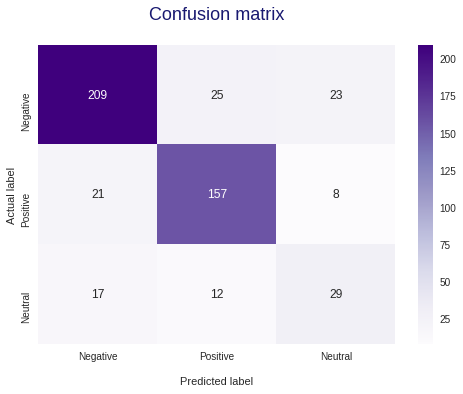

In [ ]:
calculate_accuracy("MultinomialNB",model=mlnNB)

In [ ]:
report(name="MultinomialNB",model=mlnNB)

                   Classification Report
                   
              precision    recall  f1-score   support

    Negative      0.846     0.813     0.829       257
    Positive      0.809     0.844     0.826       186
     Neutral      0.483     0.500     0.492        58

    accuracy                          0.788       501
   macro avg      0.713     0.719     0.716       501
weighted avg      0.790     0.788     0.789       501



BernoulliNB Accuracy :  74.8502994011976 %



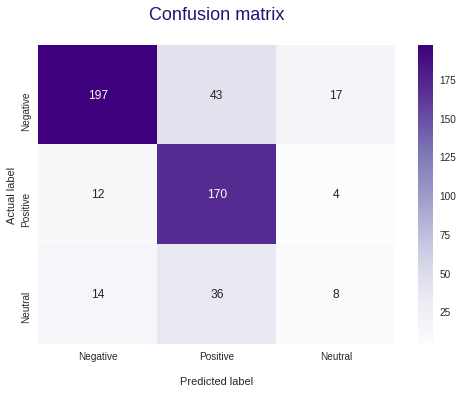

In [ ]:
calculate_accuracy("BernoulliNB",model=bnlNB)

In [ ]:
report("BernoulliNB",model=bnlNB)

                   Classification Report
                   
              precision    recall  f1-score   support

    Negative      0.883     0.767     0.821       257
    Positive      0.683     0.914     0.782       186
     Neutral      0.276     0.138     0.184        58

    accuracy                          0.749       501
   macro avg      0.614     0.606     0.595       501
weighted avg      0.739     0.749     0.733       501



GaussianNB Accuracy :  79.44111776447106 %



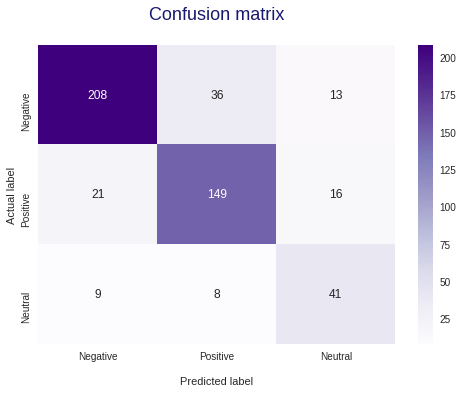

In [ ]:
calculate_accuracy("GaussianNB",model=gNB)

In [ ]:
report("GaussianNB",model=gNB)

                   Classification Report
                   
              precision    recall  f1-score   support

    Negative      0.874     0.809     0.840       257
    Positive      0.772     0.801     0.786       186
     Neutral      0.586     0.707     0.641        58

    accuracy                          0.794       501
   macro avg      0.744     0.772     0.756       501
weighted avg      0.803     0.794     0.797       501



## Support Vector Classifier

Linear SVC Accuracy :  80.43912175648703 %



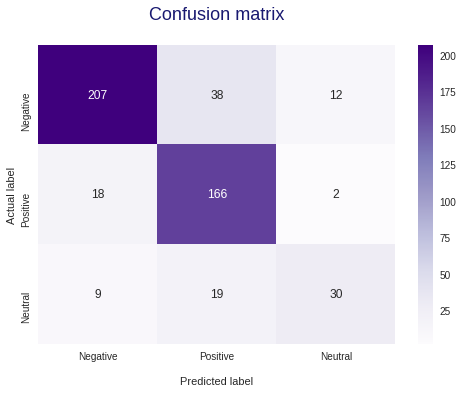

In [ ]:
calculate_accuracy("Linear SVC",model=linear_svc)

In [ ]:
report("Linear SVC",model=linear_svc)

                   Classification Report
                   
              precision    recall  f1-score   support

    Negative      0.885     0.805     0.843       257
    Positive      0.744     0.892     0.812       186
     Neutral      0.682     0.517     0.588        58

    accuracy                          0.804       501
   macro avg      0.770     0.738     0.748       501
weighted avg      0.809     0.804     0.802       501



## Logistic Regression

Logistic Regression Accuracy :  83.03393213572853 %



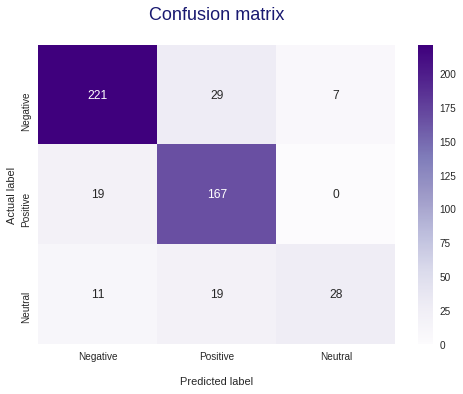

In [ ]:
calculate_accuracy('Logistic Regression', model=mlogR)

In [ ]:
report('Logistic Regression', model=mlogR)

                   Classification Report
                   
              precision    recall  f1-score   support

    Negative      0.880     0.860     0.870       257
    Positive      0.777     0.898     0.833       186
     Neutral      0.800     0.483     0.602        58

    accuracy                          0.830       501
   macro avg      0.819     0.747     0.768       501
weighted avg      0.833     0.830     0.825       501



# Acuracy Comparison

In [ ]:
modelNames=[]
accuracies=[]
def calculate_comperative_accuracy(name,actual, model):
    predictions = model.predict(X_test)
    total = len(predictions)
    idx = 0
    error = 0
    while idx < total:
        if predictions[idx] != actual[idx]:
            p = predictions[idx]
            a = actual[idx]
            error += 1
        idx += 1
    print(name, ':\n')
    print("Total=", total)
    print("Error=", error)
    accracy=((total - error) * 100) / total
    print("Accuracy = ", accracy,'%\n')
    #print("actual accracy = ", actual_accracy,'%\n')
    modelNames.append(name)
    accuracies.append(accracy)

In [ ]:
calculate_comperative_accuracy('MultinomialNB',y_test, model=mlnNB)

calculate_comperative_accuracy('BernoulliNB',y_test, model=bnlNB)

calculate_comperative_accuracy('GaussianNB',y_test, model=gNB)

calculate_comperative_accuracy('Linear SVC',y_test, model=linear_svc)

calculate_comperative_accuracy('Logistic Regression',y_test, model=mlogR)

MultinomialNB :

Total= 501
Error= 106
Accuracy =  78.84231536926147 %

BernoulliNB :

Total= 501
Error= 126
Accuracy =  74.8502994011976 %

GaussianNB :

Total= 501
Error= 103
Accuracy =  79.44111776447106 %

Linear SVC :

Total= 501
Error= 98
Accuracy =  80.43912175648703 %

Logistic Regression :

Total= 501
Error= 85
Accuracy =  83.03393213572855 %



## Final Comparison

In [ ]:
data = {'Model Name': modelNames,
        'Accuracy': accuracies
        }

new_df = pd.DataFrame(data, columns = ['Model Name', 'Accuracy'])
new_df.sort_values(by=['Accuracy'], inplace=True, ascending=False)
print(new_df)

            Model Name   Accuracy
4  Logistic Regression  83.033932
3           Linear SVC  80.439122
2           GaussianNB  79.441118
0        MultinomialNB  78.842315
1          BernoulliNB  74.850299


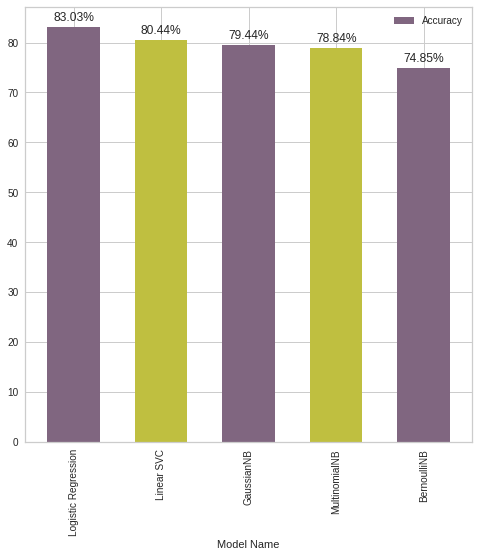

In [ ]:
my_colors = [(0.5,0.4,0.5), (0.75, 0.75, 0.25)]*5
ax=new_df.plot('Model Name','Accuracy','bar',color=my_colors,figsize=(8, 8),width=0.6)
for p in ax.patches:
  ax.annotate(str(np.round(p.get_height(),decimals=2))+'%',(p.get_x()+p.get_width()/2, p.get_height()),
  ha='center',va='center', xytext=(0, 10),textcoords='offset points')

# Saving the best Models

In [ ]:
from sklearn.externals import joblib
filename1 = 'linear_svc_model.sav'
joblib.dump(linear_svc, filename1)

['linear_svc_model.sav']

In [ ]:
filename2 = 'gaussian_naive_bayes_model.sav'
joblib.dump(gNB, filename2)

['gaussian_naive_bayes_model.sav']

In [ ]:
filename3 = 'logistic_regrassion_model.sav'
joblib.dump(mlogR, filename3)

['logistic_regrassion_model.sav']

# Using saved model to determine polarity of a sentence

In [ ]:
sent = 'মাশরাফি শুধু একটা নাম না এটা ২০ কোটি মানুষের আবেগের নাম ভালোবাসার নাম'

sent = clean_sentence(sent)
sent2vec = sentence_to_vector_transform(sent,stpGram_rsw)
sent_list = list()
sent_list.append(sent2vec)

loaded_model = joblib.load(filename1)
predictions = loaded_model.predict(sent_list)
print(predictions)

ans = ""
print(classDict)
for key, value in classDict.items():
    if value == predictions[0]:
        ans = key
print(ans)

[1]
{'negative': 0, 'positive': 1, 'neutral': 2}
positive


In [ ]:
sent = 'বাংলাদেশের খেলা কবে?'

sent = clean_sentence(sent)
sent2vec = sentence_to_vector_transform(sent,stpGram_rsw)
sent_list = list()
sent_list.append(sent2vec)

loaded_model = joblib.load(filename2)
predictions = loaded_model.predict(sent_list)
print(predictions)

ans = ""
print(classDict)
for key, value in classDict.items():
    if value == predictions[0]:
        ans = key
print(ans)

[2]
{'negative': 0, 'positive': 1, 'neutral': 2}
neutral


In [ ]:
sent = '১৭ বার ১০০ রানের নিচে অলআউট হওয়ার রেকর্ড শুধু বাংলাদেশেরই'

sent = clean_sentence(sent)
sent2vec = sentence_to_vector_transform(sent,stpGram_rsw)
sent_list = list()
sent_list.append(sent2vec)

loaded_model = joblib.load(filename3)
predictions = loaded_model.predict(sent_list)
print(predictions)

ans = ""
print(classDict)
for key, value in classDict.items():
    if value == predictions[0]:
        ans = key
print(ans)

[0]
{'negative': 0, 'positive': 1, 'neutral': 2}
negative
